In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DF=pd.read_csv(r'C:\Users\gauta\Project\Mini Project\Diabetes Retinopathy Diagnosis\train.csv')

In [3]:
DF.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [4]:
DF['Binary_Type']=DF['diagnosis'].apply(lambda d:0 if d==0 else 1)

In [5]:
Stages={0:'No_DR',1:'Mild',2:'Moderate',3:'Severe',4:'Proliferate_DR'}
DF['Stage']=DF['diagnosis'].map(Stages.get)

In [6]:
DF.head()

,id_code,diagnosis,Binary_Type,Stage
0,000c1434d8d7,2,1,Moderate
1,001639a390f0,4,1,Proliferate_DR
2,0024cdab0c1e,1,1,Mild
3,002c21358ce6,0,0,No_DR
4,005b95c28852,0,0,No_DR


In [7]:
import seaborn as sns

<Axes: xlabel='Binary_Type', ylabel='count'>

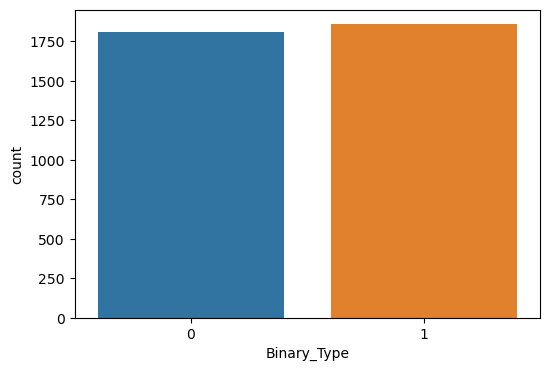

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=DF['Binary_Type'],data=DF)

<Axes: xlabel='Stage', ylabel='count'>

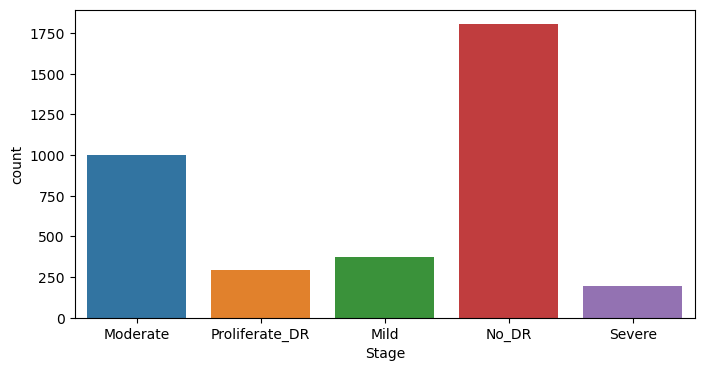

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x=DF['Stage'],data=DF)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_sub, val_data=train_test_split(DF, test_size=0.15, stratify=DF['Stage'])

train, test=train_test_split(train_sub, test_size= 0.15 / (1 - 0.15), stratify=train_sub['Stage'])

In [12]:
print('*Traing Data \n')
print(train['Stage'].value_counts(),'\n')
print('*Validation Data\n')
print(val_data['Stage'].value_counts(),'\n')
print('*Test Data\n')
print(test['Stage'].value_counts(),'\n')

*Traing Data 

Stage
No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: count, dtype: int64 

*Validation Data

Stage
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 

*Test Data

Stage
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 



In [13]:
import shutil

In [14]:
base_dir=''
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
val_dir=os.path.join(base_dir,'validation')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

In [15]:
img_src=r'C:\Users\gauta\Project\Mini Project\Diabetes Retinopathy Diagnosis\gaussian_filtered_images\gaussian_filtered_images'

for index, row in train.iterrows():
    diagnosis = row['Stage']
    binary_type = row['Binary_Type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(img_src, diagnosis, id_code)
    dstfile = os.path.join(train_dir, str(binary_type))
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val_data.iterrows():
    diagnosis = row['Stage']
    binary_type = row['Binary_Type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(img_src, diagnosis, id_code)
    dstfile = os.path.join(val_dir, str(binary_type))
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in test.iterrows():
    diagnosis = row['Stage']
    binary_type= row['Binary_Type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(img_src, diagnosis, id_code)
    dstfile = os.path.join(test_dir, str(binary_type))
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)